In [97]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Dados de entrada
raio_estaca = 0.5
distancia = raio_estaca * 2.5
largura = 6
altura = 3
n_estacas = int(4)
n_estacas_centrais = int(round(2))
L_estacas = 20
#d_dolphins_embarcação = largura + 5

#Angulos
#Para as inclinações verticais de todas as estacas, temos 90 graus, 1/10, 1/8, 1/6, 1/5, 1/4:
angulos_1=[-90, -84.29, -82.87, -80.54, -78.69, -75.96]
#Para as estacas centrais, os angulos horizontais são 180 e -180
angulos_2=[0, 180]

def gerar_pontos(n, k):
    pontos = []
    tentativas = 0
    # Gerar n pontos dentro dos limites especificados
    while len(pontos) < n and tentativas < 1000000:
        x = round(random.uniform(raio_estaca, largura - raio_estaca), 1)
        y = round(random.uniform(raio_estaca, altura - raio_estaca), 1)
        z = 0
        ponto = (x, y, z)
        if todos_os_pontos_distancia_minima(ponto, pontos):
            pontos.append(ponto)
            tentativas = 0
        else:
            tentativas += 1
    pontos.sort(key=lambda x: x[0])
    
    # Gerar k pontos adicionais para o centro do dolphin
    for _ in range(k):
        x = round(random.uniform(raio_estaca, largura - raio_estaca), 1)
        y = 0
        z = 0
        ponto = (x, y, z)
        # Verificar se o ponto mantém a distância mínima em relação a todos os pontos já existentes
        if todos_os_pontos_distancia_minima(ponto, pontos):
            pontos.append(ponto)
        else:
            tentativas += 1
    if len(pontos) < n + k:
        #print("NÃO FOI POSSÍVEL GERAR PONTOS MANTENDO A DISTÂNCIA MÍNIMA.")
        return []
  
    # Organizar os pontos em ordem crescente de x. Fiz dessa forma para garantir que teremos uma ordem coerente para avaliar os pontos quando aplicar o ML
    pontos[len(pontos) - k:] = sorted(pontos[len(pontos) - k:], key=lambda x: x[0])

    return pontos

def todos_os_pontos_distancia_minima(ponto, pontos):
    for p in pontos:
        if distancia_entre_pontos(p, ponto) < distancia:
            return False
    return True

def distancia_entre_pontos(p1, p2):
    return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

def espelhar_pontos(pontos):
    espelho = [(x, -y , z) for x, y , z in pontos[:-int(n_estacas_centrais)]]
    return espelho

In [98]:
n_estacas = int(4)
n_estacas_centrais = int(round(2))

def funcao_Objetivo(n, k):
    i = 0
    pontos_iniciais = []
    
    while i < 10000 and not pontos_iniciais:
        pontos = gerar_pontos(n, k)
        espelhos = espelhar_pontos(pontos)
        pontos_iniciais = pontos + espelhos
        
        if pontos_iniciais:
            df = pd.DataFrame(pontos_iniciais, columns=['X', 'Y', 'Z'])
            print(df)
            print(pontos_iniciais)
            pontos_espelho = pontos + espelhos
        i += 1
    
    return pontos_iniciais,pontos_espelho,pontos

# Uso da função funcao_Objetivo
pontos_iniciais,pontos_espelho,pontos = funcao_Objetivo(int(n_estacas), int(n_estacas_centrais))


     X    Y  Z
0  1.1  1.9  0
1  3.2  2.3  0
2  4.5  2.3  0
3  4.8  0.9  0
4  1.1  0.0  0
5  3.4  0.0  0
6  1.1 -1.9  0
7  3.2 -2.3  0
8  4.5 -2.3  0
9  4.8 -0.9  0
[(1.1, 1.9, 0), (3.2, 2.3, 0), (4.5, 2.3, 0), (4.8, 0.9, 0), (1.1, 0, 0), (3.4, 0, 0), (1.1, -1.9, 0), (3.2, -2.3, 0), (4.5, -2.3, 0), (4.8, -0.9, 0)]


In [99]:
def gerar_angulos_aleatorios_verticais(n_estacas,n_estacas_centrais):
    #Gerar angulos aleatorios para as estacas laterais
    angulos_aleatorios = np.random.choice(angulos_1, size=n_estacas)
    #Gerar angulos aleatorios para as estacas centrais
    angulo_central_aleatorio = np.random.choice(angulos_1, size=n_estacas_centrais)
    angulos_verticais_theta= np.concatenate((angulos_aleatorios,angulo_central_aleatorio, angulos_aleatorios))
    return angulos_verticais_theta

def gerar_angulos_aleatorios_horizontais(n_estacas,n_estacas_centrais):
    ang_limite_horizontal = 360
    angulos_aleatorios = np.round(np.random.uniform(0,ang_limite_horizontal, size=n_estacas),2)
    angulo_central_aleatorio = np.random.choice(angulos_2, size=n_estacas_centrais)
    angulos_horizontais_theta = np.concatenate((angulos_aleatorios,angulo_central_aleatorio, -1*angulos_aleatorios))
    return angulos_horizontais_theta

angulos_horizontais_theta = gerar_angulos_aleatorios_horizontais(int(n_estacas),int(n_estacas_centrais))
angulos_verticais_theta = gerar_angulos_aleatorios_verticais(int(n_estacas),int(n_estacas_centrais))

#Angulos verticais
df = pd.DataFrame(angulos_verticais_theta, columns=['Ângulos Verticais'])
print(df)

#Angulos horizontais
df = pd.DataFrame(angulos_horizontais_theta, columns=['Ângulos Horizontais'])
print(df)

   Ângulos Verticais
0             -84.29
1             -78.69
2             -90.00
3             -82.87
4             -75.96
5             -78.69
6             -84.29
7             -78.69
8             -90.00
9             -82.87
   Ângulos Horizontais
0                49.20
1               242.67
2               357.17
3                32.21
4                 0.00
5               180.00
6               -49.20
7              -242.67
8              -357.17
9               -32.21


In [100]:
L_estacas = 20

def spherical_to_cartesian(x_inicial, y_inicial, z_inicial, L_estacas, angulos_verticais_theta, angulos_horizontais_theta):
    # Converter os ângulos de graus para radianos
    angulo_vertical_rad = np.deg2rad(angulos_verticais_theta)
    angulo_horizontal_rad = np.deg2rad(angulos_horizontais_theta)
    
    # Calcular os componentes do vetor nas direções X, Y e Z
    componente_x = L_estacas * np.cos(angulo_vertical_rad) * np.cos(angulo_horizontal_rad)
    componente_y = L_estacas * np.cos(angulo_vertical_rad) * np.sin(angulo_horizontal_rad)
    componente_z = L_estacas * np.sin(angulo_vertical_rad)
    # Calcular as coordenadas finais
    x_final = x_inicial + componente_x
    y_final = y_inicial + componente_y
    z_final = z_inicial + componente_z

    return x_final, y_final, z_final

def gerar_pontos_finais(pontos, angulos_verticais_theta, angulos_horizontais_theta):
    coordenadas_finais = []
    # Iterar por cada ponto inicial e seus ângulos correspondentes
    for i in range(len(pontos)):
        x, y, z = pontos[i]
        theta_v, theta_h = angulos_verticais_theta[i], angulos_horizontais_theta[i]
        x_final, y_final, z_final = spherical_to_cartesian(x, y, z, L_estacas, theta_v, theta_h)
        
        coordenadas_finais.append((round(x_final,2), round(y_final,2), round(z_final,2)))
    return coordenadas_finais

def espelhar_pontos(pontos, k):
    espelho = []
    # Calcular os pontos espelhados, exceto para os últimos k pontos relacionados às estacas centrais
    for (x, y, z) in pontos[:-k]:
        y_espelhado = -y
        espelho.append((x, y_espelhado, z))
    return espelho

# Calcular as coordenadas finais para cada ponto inicial
coordenadas_finais = gerar_pontos_finais(pontos, angulos_verticais_theta, angulos_horizontais_theta)
espelhos_finais = espelhar_pontos(coordenadas_finais, int(n_estacas_centrais))
pontos_finais = np.array(coordenadas_finais + espelhos_finais)

#Coordenadas iniciais 
df = pd.DataFrame(pontos_iniciais, columns=['X', 'Y', 'Z'])
print("Coordenadas iniciais:")
print(df)


df = pd.DataFrame(pontos_finais, columns=['X', 'Y', 'Z'])
#Definir o titulo da tabela
print("Coordenadas finais prévias:")
print(df)

Coordenadas iniciais:
     X    Y  Z
0  1.1  1.9  0
1  3.2  2.3  0
2  4.5  2.3  0
3  4.8  0.9  0
4  1.1  0.0  0
5  3.4  0.0  0
6  1.1 -1.9  0
7  3.2 -2.3  0
8  4.5 -2.3  0
9  4.8 -0.9  0
Coordenadas finais prévias:
      X     Y      Z
0  2.40  3.41 -19.90
1  1.40 -1.18 -19.61
2  4.50  2.30 -20.00
3  6.90  2.22 -19.85
4  5.95  0.00 -19.40
5 -0.52  0.00 -19.61
6  2.40 -3.41 -19.90
7  1.40  1.18 -19.61
8  4.50 -2.30 -20.00
9  6.90 -2.22 -19.85


Esse é um print prévio de como as estacas estão posicionadas antes da otimizaçao, irei retirar ele posteriormente.
Escolhi a metodologia de gerar pontos aleatórios e depois ajustálos conforme as exigências

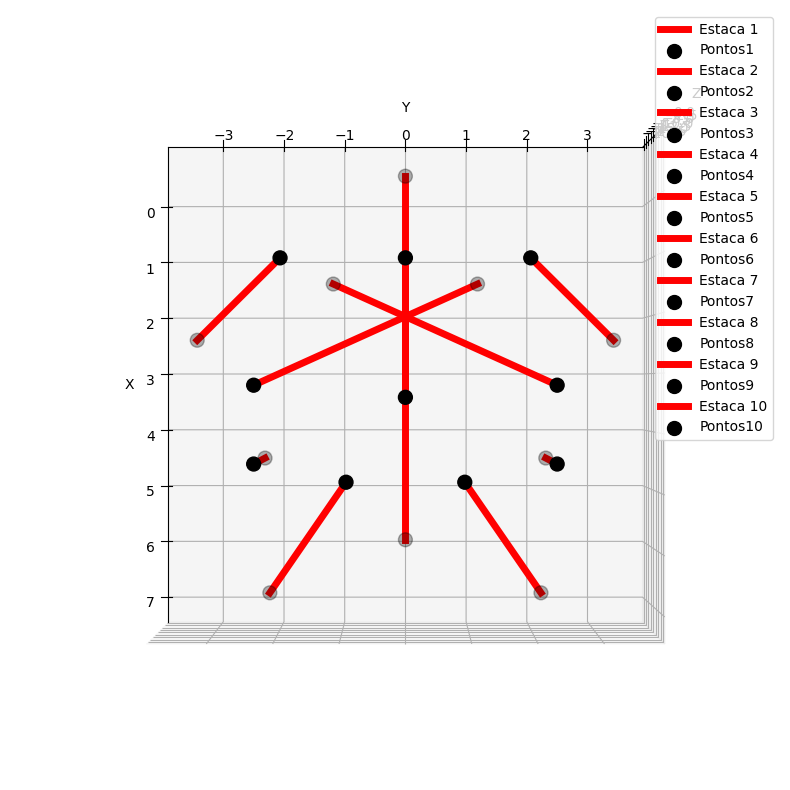

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_estacas(pontos_finais, pontos_iniciais, tube_radius=5):
    # Configurar a figura e o eixo 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Iterar por cada estaca com base nos pontos finais e iniciais
    for i, (ponto_final, ponto_inicial) in enumerate(zip(pontos_finais, pontos_iniciais)):
        x_start, y_start, z_start = ponto_inicial
        x_end, y_end, z_end = ponto_final
        
        # Plotar a linha da estaca entre o ponto inicial e final
        ax.plot([x_start, x_end], [y_start, y_end], [z_start, z_end], color='r', linewidth=tube_radius, label=f'Estaca {i + 1}')
        
        # Plotar os pontos iniciais e finais
        ax.scatter([x_start, x_end], [y_start, y_end], [z_start, z_end], color='black', marker='o', s=100, label=f'Pontos{i+1}')

    # Configurar os rótulos dos eixos
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Adicionar uma legenda
    ax.legend()
    
    # Definir a visualização 3D com uma certa perspectiva
    #ax.view_init(45, 45)
    ax.view_init(90, 0)
    
    plt.show()

# Usar a função para plotar as estacas com base nos pontos finais e iniciais fornecidos
plot_estacas(pontos_finais, pontos_iniciais)

Aqui irei utilizar um otimizador para recalcular e ajustar os pontos finais da estrutura.

[[ 1.1  1.9  0. ]
 [ 3.2  2.3  0. ]
 [ 4.5  2.3  0. ]
 [ 4.8  0.9  0. ]
 [ 1.1  0.   0. ]
 [ 3.4  0.   0. ]
 [ 1.1 -1.9  0. ]
 [ 3.2 -2.3  0. ]
 [ 4.5 -2.3  0. ]
 [ 4.8 -0.9  0. ]]
Analisando o ponto 0
Analisando a estaca 0 e a estaca 1: distância entre pontos finais = 4.71 & menor distância entre os 2 vetores = 1.57
Analisando a estaca 0 e a estaca 2: distância entre pontos finais = 2.38 & menor distância entre os 2 vetores = 2.43
Ajustando a estaca 0: novas coordenadas finais = [-2.53, -1.32, -19.4]
Analisando o ponto 0
Analisando a estaca 0 e a estaca 1: distância entre pontos finais = 3.94 & menor distância entre os 2 vetores = 2.23
Analisando a estaca 0 e a estaca 2: distância entre pontos finais = 7.93 & menor distância entre os 2 vetores = 3.63
Analisando a estaca 0 e a estaca 3: distância entre pontos finais = 10.08 & menor distância entre os 2 vetores = 4.06
Analisando a estaca 0 e a estaca 4: distância entre pontos finais = 8.58 & menor distância entre os 2 vetores = 1.79
Ana

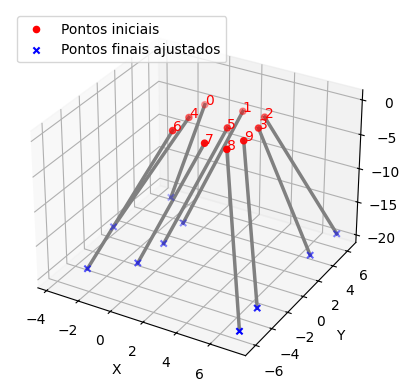

In [109]:
import numpy as np
comprimento = 20
distancia_minima = 2.5
angulos_1 = np.array([-90, -84.29, -82.87, -80.54, -78.69, -75.96])
angulos_2 = np.array([0, 180])

raio_estaca = 0.5
distancia = raio_estaca * 2.5 #5 vezes o raio da estaca
largura = 6
altura = 3
n_estacas = int(4)
n_estacas_centrais = int(round(2))
d_dolphins_embarcação = largura + 5

# Função para calcular a distância euclidiana entre dois pontos em R3
def distancia_entre_pontos_r3(p1, p2):
    return round(np.linalg.norm(p1 - p2),2)

# Função para converter coordenadas esféricas para cartesianas
def spherical_to_cartesian(x_inicial, y_inicial, z_inicial, L_estacas, angulos_verticais_theta, angulos_horizontais_theta):
    angulo_vertical_rad = np.deg2rad(angulos_verticais_theta)
    angulo_horizontal_rad = np.deg2rad(angulos_horizontais_theta)
    
    componente_x = L_estacas * np.cos(angulo_vertical_rad) * np.cos(angulo_horizontal_rad)
    componente_y = L_estacas * np.cos(angulo_vertical_rad) * np.sin(angulo_horizontal_rad)
    componente_z = L_estacas * np.sin(angulo_vertical_rad)

    x_final = x_inicial + componente_x
    y_final = y_inicial + componente_y
    z_final = z_inicial + componente_z

    return x_final, y_final, z_final

print(pontos_iniciais)
# Função para encontrar a menor distância entre os vetores correspondentes aos índices k e l
def encontrar_menor_distancia_entre_vetores(pontos_iniciais, pontos_finais, k, l, comprimento):

    vetor_k = pontos_finais[k] - pontos_iniciais[k]
    vetor_l = pontos_finais[l] - pontos_iniciais[l]

    vetor_dividido_k = vetor_k / comprimento
    vetor_dividido_l = vetor_l / comprimento

    menor_distancia = float('inf')
    ponto_menor_distancia_v1 = None
    ponto_menor_distancia_v2 = None
    N_v1 = None
    N_v2 = None

    for N1 in np.arange(1, 19, 1):
        for N2 in np.arange(1, 19, 1):
            ponto_v1 = pontos_iniciais[k] + N1 * vetor_dividido_k
            ponto_v2 = pontos_iniciais[l] + N2 * vetor_dividido_l

            dist = round(distancia_entre_pontos_r3(ponto_v1, ponto_v2),2)

            if dist < menor_distancia:
                menor_distancia = dist
                ponto_menor_distancia_v1 = ponto_v1
                ponto_menor_distancia_v2 = ponto_v2
                N_v1 = N1
                N_v2 = N2

    return menor_distancia, ponto_menor_distancia_v1, ponto_menor_distancia_v2, N_v1, N_v2


# Função para ajustar os pontos finais com base nas distâncias mínimas
def verificar_e_ajustar_pontos(pontos, comprimento, distancia_minima, pontos_finais, max_iteracoes=100000):
    iteracao = 0  # Contador de iterações para evi tar loops infinitos
    pontos_finais = np.array(pontos_finais)

    for k in range(n_estacas + n_estacas_centrais):
        while True:
            ajustou_ponto = False  # Flag para verificar se o ponto foi ajustado
            copia_pontos_finais = np.copy(pontos_finais)

            print(f"Analisando o ponto {k}")

            for l in range(len(pontos_finais)):
                if k == l:
                    continue
                ponto1 = pontos_finais[k]
                ponto2 = pontos_finais[l]
                dist = distancia_entre_pontos_r3(ponto1, ponto2)
                menor_distancia, _, _, _, _ = encontrar_menor_distancia_entre_vetores(pontos, pontos_finais, k, l, comprimento)

                print(f"Analisando a estaca {k} e a estaca {l}: distância entre pontos finais = {dist} & menor distância entre os 2 vetores = {menor_distancia}")
                # Aqui irei controlar as distãnccias mínimas entre pontos
                if menor_distancia < 3 * raio_estaca/1 or dist < 5 * raio_estaca/1:
                    ajustou_ponto = True
                    # Verificar se o ponto atual é uma estaca central ou não
                    if k < n_estacas:
                        novo_angulo_vertical = np.random.choice(angulos_1)
                        novo_angulo_horizontal = np.round(np.random.uniform(0, 360), 2)
                    else:
                        novo_angulo_vertical = np.random.choice(angulos_1)
                        novo_angulo_horizontal = np.random.choice(angulos_2)

                    # Calcular novas coordenadas finais
                    x_novo, y_novo, z_novo = spherical_to_cartesian(
                        pontos[k][0], pontos[k][1], pontos[k][2],
                        comprimento, novo_angulo_vertical, novo_angulo_horizontal
                    )
                    # Arredondar as coordenadas finais
                    x = np.round(x_novo, 2)
                    y = np.round(y_novo, 2)
                    z = np.round(z_novo, 2)

                    # Atualizar as coordenadas finais do ponto original
                    if k < n_estacas:
                        pontos_finais[k, :] = [x, y, z]
                        pontos_finais[k + n_estacas + n_estacas_centrais, :] = [x, -y, z]
                    else:
                        pontos_finais[k, :] = [x, y, z]

                    print(f"Ajustando a estaca {k}: novas coordenadas finais = {[x, y, z]}")
                    break  # Saia do loop 'l' e recomece a verificação para o mesmo ponto 'k'

            if not ajustou_ponto:
                print(f"Coordenada não ajustada da estaca {k}: {copia_pontos_finais[k]}")
                print(f"Coordenada final da estaca {k}: {pontos_finais[k]}")
                break  # Sai do loop 'while' e passa para o próximo ponto 'k'

            iteracao += 1
            if iteracao >= max_iteracoes:
                print(f"Número máximo de iterações atingido. Há pontos não ajustados. Última estaca ajustado: {k}")
                return []

    return pontos_finais



#pontos_iniciais = np.array([[0, 0.9, 0],[2, 0, 0],[4, 0, 0],[6, 0, 0],[8, 0.0, 0],[10, 0.0, 0],[0, -0.9, 0],[-2, 0, 0],[-4, 0, 0],[-6, 0, 0]])

#pontos_finais = np.array([[0, 0.9, -20],[2, 0, -20],[4, 0, -20],[6, 0, -20],[8, 0.0, -20],[10, 0.0, -20],[0, -0.9, -20],[-2, 0, -20],[-4, 0, -20],[-6, 0, -20]])

# Ajustar pontos finais com base na distância mínima
pontos_finais_ajustados = verificar_e_ajustar_pontos(pontos_iniciais, comprimento, distancia_minima, pontos_finais)

print(pontos_finais_ajustados)


# Converter para array NumPy
pontos_iniciais = np.array(pontos_iniciais)
pontos_finais_ajustados = np.array(pontos_finais_ajustados)
#plotar um scatter plot 2D com os pontos inicias e outro com os finais
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ENUMERAR OS PONTOS INICIAIS E FINAIS
for i, txt in enumerate(pontos_iniciais):
    ax.text(txt[0], txt[1], txt[2], f'{i}', color='red')

ax.scatter(pontos_iniciais[:, 0], pontos_iniciais[:, 1], pontos_iniciais[:, 2], c='r', marker='o', label='Pontos iniciais')
ax.scatter(pontos_finais_ajustados[:, 0], pontos_finais_ajustados[:, 1], pontos_finais_ajustados[:, 2], c='b', marker='x', label='Pontos finais ajustados')

# Conectar os pontos iniciais e finais com uma linha
for i in range(len(pontos_iniciais)):
    ax.plot([pontos_iniciais[i, 0], pontos_finais_ajustados[i, 0]], 
            [pontos_iniciais[i, 1], pontos_finais_ajustados[i, 1]], 
            [pontos_iniciais[i, 2], pontos_finais_ajustados[i, 2]], 
            color='gray', linewidth=2.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.legend(loc='upper left')
plt.show()


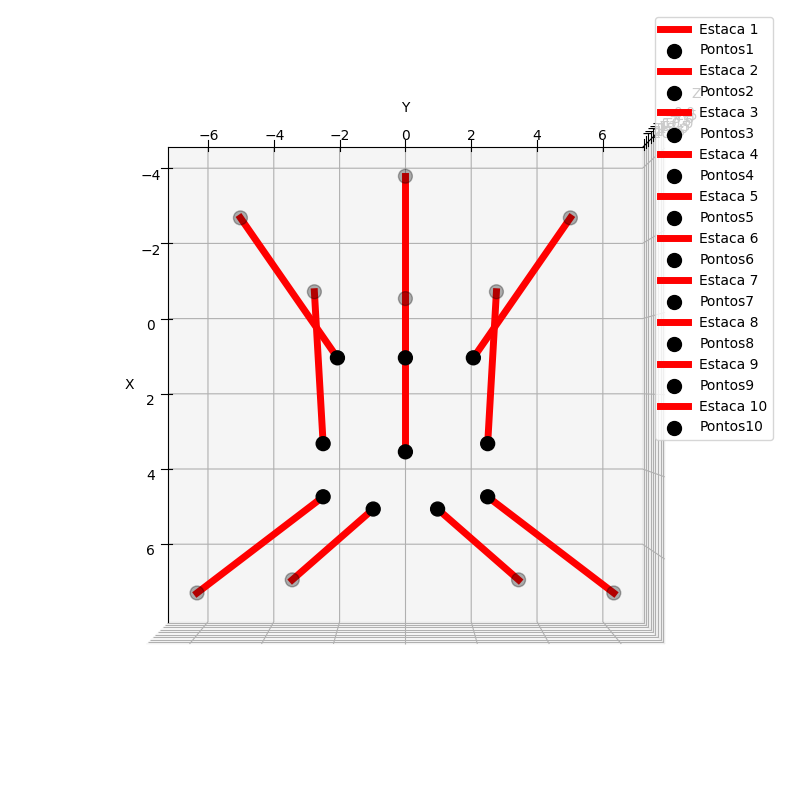

comprimento do array de pontos finais: 10
comprimento do array de pontos iniciais: 10


In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_estacas(pontos_finais_ajustados, pontos_iniciais, tube_radius=5):
    # Configurar a figura e o eixo 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Iterar por cada estaca com base nos pontos finais e iniciais
    for i, (ponto_final, ponto_inicial) in enumerate(zip(pontos_finais_ajustados, pontos_iniciais)):
        x_start, y_start, z_start = ponto_inicial
        x_end, y_end, z_end = ponto_final
        
        # Plotar a linha da estaca entre o ponto inicial e final
        ax.plot([x_start, x_end], [y_start, y_end], [z_start, z_end], color='r', linewidth=tube_radius, label=f'Estaca {i + 1}')
        
        # Plotar os pontos iniciais e finais
        ax.scatter([x_start, x_end], [y_start, y_end], [z_start, z_end], color='black', marker='o', s=100, label=f'Pontos{i+1}')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    
    # Definir a visualização 3D com uma certa perspectiva
    #ax.view_init(45, 45)
    ax.view_init(90, 0)
    
    plt.show()
plot_estacas(pontos_finais_ajustados, pontos_iniciais)

print("comprimento do array de pontos finais:", len(pontos_finais))
print("comprimento do array de pontos iniciais:", len(pontos_iniciais))


In [120]:
from ansys.mapdl.core import launch_mapdl
import pandas as pd

def launch_mapdl_on_available_port(starting_port=50052, max_attempts=5):
    for i in range(max_attempts):
        port = starting_port + i
        try:
            mapdl = launch_mapdl(port=port)
            print(f"MAPDL launched successfully on port {port}")
            return mapdl
        except Exception as e:
            print(f"Failed to launch MAPDL on port {port}: {e}")
    raise RuntimeError("Could not launch MAPDL on any available port")

# Use a função para iniciar uma instância do MAPDL
mapdl = launch_mapdl_on_available_port()

MAPDL launched successfully on port 50052


In [121]:
mapdl.clear('NOSTART')
mapdl.prep7()

# Título
mapdl.title('Análise de Estacas e Casca')

# Definir o tipo de elemento (BEAM188) e suas propriedades
mapdl.et(1, 'BEAM188')

# Propriedades do material
modulo_elasticidade = 0.85 * 5600 * (40 ** 0.5) * 1e6  # N/m²
mapdl.mp('EX', 1, modulo_elasticidade)
mapdl.mp('PRXY', 1, 0.2)  # Coeficiente de Poisson
mapdl.mp('DENS', 1, 2500)  # Densidade

# Propriedades da seção da viga
mapdl.sectype(1, 'BEAM', 'CSOLID')
mapdl.secoffset('CENT')
mapdl.secdata(0.5)

# Número de nós intermediários
num_intermediate_nodes = 39

# Adicionar nós
node_id = 1
for i in range(10):
    # Obter coordenadas iniciais e finais
    x_inicial, y_inicial, z_inicial = pontos_iniciais[i]
    x_final, y_final, z_final = pontos_finais_ajustados[i]
    
    # Criar o nó inicial
    mapdl.n(node_id, x_inicial, y_inicial, z_inicial)
    
    # Definir o ID do nó final
    node_id_final = node_id + num_intermediate_nodes + 1
    
    # Criar o nó final
    mapdl.n(node_id_final, x_final, y_final, z_final)
    
    # Travar o nó final
    mapdl.d(node_id_final, 'ALL', 0)
    
    # Preencher nós intermediários
    mapdl.fill(node_id, node_id_final, num_intermediate_nodes)
    
    # Atualizar o próximo node_id

    node_id = node_id_final + 1

# Geração de elementos
n_elemento = 1
for i in range(10):
    for j in range(1, num_intermediate_nodes + 2):
        N_1 = j + (num_intermediate_nodes + 2) * (i)
        N_2 = N_1 + 1
        mapdl.en(n_elemento, N_1, N_2)
        n_elemento += 1

# Selecionar elementos tipo BEAM188
mapdl.esel('S', 'TYPE', '', 1)

# Contar elementos selecionados
num_elem = mapdl.get('num_elem', 'ELEM', 0, 'COUNT')
k = num_elem

# Criar elemento de carga
mapdl.n(1000, 3, 0, 0)
mapdl.n(1001, 3, 0, 0.1)
mapdl.en(k + 1, 1000, 1001)

# Definir tipo de elemento SHELL181
mapdl.et(2, 'SHELL181')
mapdl.keyopt(2, 8, 2)  # Elastoplástico
mapdl.keyopt(2, 3, 2)  # Precisão de tensões

# Propriedades do material para SHELL181
modulo_elasticidade_shell = 0.85 * 5600 * (20 ** 0.5) * 1e6
mapdl.mp('EX', 2, modulo_elasticidade_shell)
mapdl.mp('PRXY', 2, 0.2)
mapdl.mp('DENS', 2, 2500)

# Definir seção de casca
mapdl.sectype(2, 'SHELL')
mapdl.secdata(1.5)

# Criar retângulo e malhar
mapdl.rectng(0, 6, -3, 3)
mapdl.esize(0.1)
mapdl.amesh('ALL')

# Selecionar elementos tipo SHELL181
mapdl.esel('S', 'TYPE', '', 2)
mapdl.emodif('ALL', 'SECNUM', 2)

# Merge de nós
mapdl.nsel('S', 'LOC', 'Z', 0, 1e5)
mapdl.nummrg('NODE', 1e-5)
mapdl.nsel('ALL')

# Saída dos resultados
mapdl.allsel('ALL')
mapdl.nlist('ALL', '', '', 'XYZ', 'NODE', 'NODE', 'NODE')
mapdl.elist('ALL', '', '', 0, 0)

# Aplicar gravidade
mapdl.acel(0, 0, -9.81)

# Finalizar
mapdl.finish() 

***** ROUTINE COMPLETED *****  CP =         0.297

In [122]:
mapdl.eplot()

Widget(value='<iframe src="http://localhost:62142/index.html?ui=P_0x2ab1e8112b0_9&reconnect=auto" class="pyvis…

In [123]:
# Entrar no modo de solução
mapdl.slashsolu()
mapdl.antype(0)

PERFORM A STATIC ANALYSIS
  THIS WILL BE A NEW ANALYSIS

In [124]:
import math
# Definir a força aplicada e o número de load steps
f = 1000000  # Força de 1 milhão de N

# Loop para aplicar as diferentes condições de carga
for i in range(1, 4):
    # Calcular o ângulo em radianos
    Rad = (i-1)*45*math.pi/180

    # Calcular as componentes da força horizontal
    FX = math.cos(Rad)*f
    FY = math.sin(Rad)*f

    print(FX)
    print(FY)

    # Selecionar todos os elementos
    mapdl.allsel('ALL')

    # Aplicar as forças horizontais no nó 1001
    mapdl.f(1001, 'FX', FX)
    mapdl.f(1001, 'FY', FY)

    # Resolver o modelo
    mapdl.solve()

    # Salvar os resultados da solução
    mapdl.save(f'load_step_{i}')

# Finalizar
mapdl.finish()

1000000.0
0.0
707106.7811865476
707106.7811865476
6.123233995736767e-11
1000000.0


FINISH SOLUTION PROCESSING


 ***** ROUTINE COMPLETED *****  CP =         2.688

In [125]:
# Entrar no modo de pós-processamento
mapdl.post1()

# Definir os Load Cases para N = 3
for i in range(1, 4):
    mapdl.lcdef(i, i, 1)  # Define o Load Case i para o Load Step i 

# Carregar o primeiro Load Case
mapdl.lcase(1)

# Comparar o Load Case 1 com os demais e armazenar os resultados (máximos)
for R in range(2, 4): 
    mapdl.lcoper('MAX', R)  # Compara o Load Case na memória com os próximos
    mapdl.lcwrite(50 + R)   # Escreve o resultado em um arquivo

# Carregar o resultado do último load case comparado
mapdl.lcase(53)

# Gerar ETABLE para momentos fletores My e Mz dos elementos selecionados (valores máximos)
mapdl.etable('Fx_MAX', 'SMISC', 1, 'MAX')  # Força Axial máxima
mapdl.etable('My_MAX', 'SMISC', 2, 'MAX')  # Momento fletor máximo em Y
mapdl.etable('Mz_MAX', 'SMISC', 3, 'MAX')  # Momento fletor máximo em Z

# Carregar o primeiro Load Case novamente
mapdl.lcase(1)

# Comparar o Load Case 1 com os demais para valores mínimos
for R in range(2, 4):
    mapdl.lcoper('MIN', R)  # Compara o Load Case na memória para valores mínimos
    mapdl.lcwrite(60 + R)   # Escreve o resultado em um arquivo

# Carregar o resultado do último load case comparado
mapdl.lcase(63)

# Gerar ETABLE para momentos fletores e força axial (valores mínimos)
mapdl.etable('Fx_MIN', 'SMISC', 1, 'MIN')  # Força Axial mínima
mapdl.etable('My_MIN', 'SMISC', 2, 'MIN')  # Momento fletor mínimo em Y
mapdl.etable('Mz_MIN', 'SMISC', 3, 'MIN')  # Momento fletor mínimo em Z
mapdl.etable('Area', 'SMISC', 13)  # Área da seção transversal


STORE AREA     FROM ITEM=SMIS COMP=  13  FOR ALL SELECTED ELEMENTS

In [126]:
import pandas as pd

elementos_sequencia = []
j=1
for i in range(0,10, 1):
    y=num_intermediate_nodes*i + j
    elementos_sequencia.append(y)
    elementos_sequencia.append(y+num_intermediate_nodes)         # Adiciona o primeiro elemento do intervalo
    j +=1

# Dicionário para armazenar os resultados
data = {
    "Element": [],
    "Fx_MAX": [],
    "Fx_MIN": [],
    "My_MAX": [],
    "My_MIN": [],
    "Mz_MAX": [],
    "Mz_MIN": [],
}

# Extraindo valores com mapdl.get_value para cada elemento na sequência
for elem in elementos_sequencia:
    fx_max = -1*mapdl.get_value('ELEM', elem, 'ETABLE', 'Fx_MAX')/1000
    fx_min = -1*mapdl.get_value('ELEM', elem, 'ETABLE', 'Fx_MIN')/1000
    my_max = mapdl.get_value('ELEM', elem, 'ETABLE', 'My_MAX')/1000
    my_min = mapdl.get_value('ELEM', elem, 'ETABLE', 'My_MIN')/1000
    mz_max = mapdl.get_value('ELEM', elem, 'ETABLE', 'Mz_MAX')/1000
    mz_min = mapdl.get_value('ELEM', elem, 'ETABLE', 'Mz_MIN')/1000

    # Adicionando os resultados à tabela
    data["Element"].append(elem)
    data["Fx_MAX"].append(fx_max)
    data["Fx_MIN"].append(fx_min)
    data["My_MAX"].append(my_max)
    data["My_MIN"].append(my_min)
    data["Mz_MAX"].append(mz_max)
    data["Mz_MIN"].append(mz_min)
# Criando o DataFrame com os resultados
df = pd.DataFrame(data)
df=df.round(0)
# Exibindo a tabela
print(df)

# Opcional: Salvar a tabela como arquivo CSV
#df.to_csv('element_results.csv', index=False)


    Element  Fx_MAX  Fx_MIN  My_MAX  My_MIN  Mz_MAX  Mz_MIN
0         1   -80.0   337.0   162.0  -264.0   186.0    97.0
1        40  -444.0   -27.0   -48.0  -382.0   -78.0  -153.0
2        41 -1055.0  -699.0    42.0  -283.0   302.0    20.0
3        80 -1423.0 -1067.0    11.0  -247.0   -16.0  -254.0
4        81   420.0   750.0   138.0   -34.0   135.0  -320.0
5       120    56.0   386.0  -225.0  -362.0   257.0  -105.0
6       121   194.0   718.0   185.0    23.0   131.0  -338.0
7       160  -177.0   348.0  -188.0  -318.0   265.0  -101.0
8       161  -337.0  -159.0   -57.0  -302.0   276.0    -0.0
9       200  -701.0  -523.0   -19.0  -207.0     0.0  -229.0
10      201  -797.0   135.0   -32.0  -284.0   326.0    -0.0
11      240 -1165.0  -233.0    13.0  -178.0     0.0  -272.0
12      241  -881.0   -80.0  -264.0  -375.0   230.0   -97.0
13      280 -1245.0  -444.0    41.0   -48.0    78.0  -187.0
14      281  -739.0   883.0  -106.0  -283.0   317.0   -20.0
15      320 -1107.0   515.0    11.0  -10

In [127]:
#Sair da port do mapdl e fechar o processo
mapdl.exit()
